In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
!pip install tensorflow

     ------------------------------------- 266.3/266.3 MB 13.1 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 47.9 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 79.4 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ---------------------------------------- 126.5/126.5 kB ? eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ------------------------------------- 895.9/895.9 kB 55.4 MB/s eta 0:00:00
     ---------------------------------------- 439.2/439.2 kB ? eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 111.7 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 17.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 31.4 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (78

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlflow 1.23.1 requires alembic, which is not installed.


In [45]:
!pip install imblearn

     -------------------------------------- 226.0/226.0 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [10]:
df = pd.read_csv("Downloads/Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5785,0506-YLVKJ,Male,0,Yes,Yes,46,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.20,917.45,No
5584,6330-JKLPC,Male,0,Yes,No,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),80.50,896.9,Yes
949,6169-PPETC,Male,0,Yes,Yes,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.50,759.35,No
2624,0820-FNRNX,Male,0,Yes,Yes,17,Yes,Yes,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,66.70,1077.05,No
1116,8461-EFQYM,Female,0,No,No,38,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,24.25,914.4,No


In [11]:
df.drop('customerID',axis='columns',inplace=True)

In [12]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [13]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [14]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [16]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


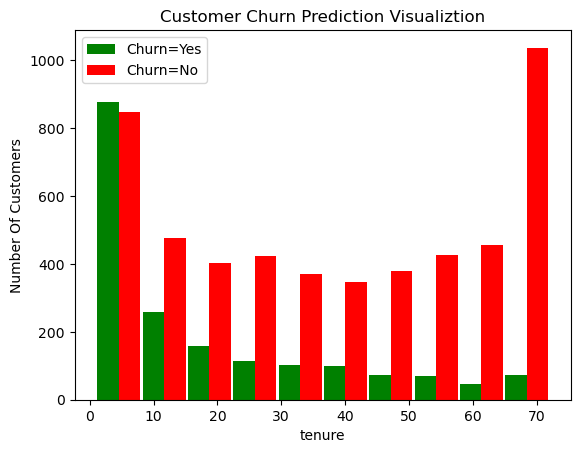

In [17]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

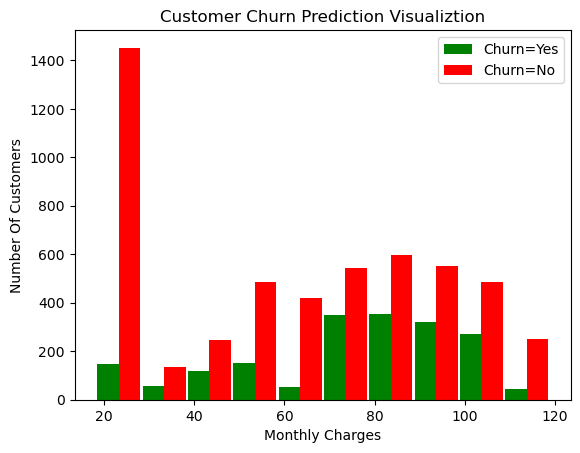

In [18]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [19]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [20]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [21]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [22]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [23]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [24]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [25]:
df1.gender.unique()

#One hot encoding for categorical columns

df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [27]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [28]:
#from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [29]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [30]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.4912 - accuracy: 0.7625
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.7948
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8016
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8002
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.8041
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8039
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8046
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8062
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8084
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4062 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8354
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.8334
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.8352
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8327
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3528 - accuracy: 0.8324
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3512 - accuracy: 0.8363
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.8354
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8379
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3501 - accuracy: 0.8395
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 

# Mitigating Skewdness of Data


# Method 1: Undersampling

In [31]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [32]:
df_class_0.shape

(5163, 27)

In [33]:
df_class_1.shape


(1869, 27)

In [34]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [35]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [36]:
y_train.value_counts()


0    1495
1    1495
Name: Churn, dtype: int64

In [37]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6681 - accuracy: 0.5896
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.7381
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5017 - accuracy: 0.7528
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4946 - accuracy: 0.7589
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4920 - accuracy: 0.7615
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4886 - accuracy: 0.7619
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7635
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7552
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7656
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.7656
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8100
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8110
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8120
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8094
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8120
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8147
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8167
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8184
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8137
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8157
Epoch 93/100


# Method2: Oversampling

In [38]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [39]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split

In [40]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [41]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6407 - accuracy: 0.6294
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7458
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5043 - accuracy: 0.7592
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4962 - accuracy: 0.7649
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7642
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7659
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7612
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.7679
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7679
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8043
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4068 - accuracy: 0.8094
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4072 - accuracy: 0.8114
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8077
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8117
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8104
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8117
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8114
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4044 - accuracy: 0.8124
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8140
Epoch 93/100


In [42]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [51]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5197 - accuracy: 0.7581
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4651 - accuracy: 0.7763
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4582 - accuracy: 0.7821
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4534 - accuracy: 0.7833
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.7838
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.7866
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7903
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4400 - accuracy: 0.7955
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.7961
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4346 - accura

259/259 [==============================] - 0s 1ms/step - loss: 0.3452 - accuracy: 0.8466
Epoch 82/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8501
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3446 - accuracy: 0.8483
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3444 - accuracy: 0.8483
Epoch 85/100
259/259 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8517
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8496
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3455 - accuracy: 0.8518
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3474 - accuracy: 0.8476
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3429 - accuracy: 0.8505
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3451 - accuracy: 

# Method4: Use of Ensemble with undersampling

In [52]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [53]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [55]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [56]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [57]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [58]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    

In [59]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6498 - accuracy: 0.6184
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5246 - accuracy: 0.7462
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7619
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4960 - accuracy: 0.7666
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7679
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7716
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7699
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7719
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7736
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7729
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.8221
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3924 - accuracy: 0.8221
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8227
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3919 - accuracy: 0.8217
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8241
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3898 - accuracy: 0.8197
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8254
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3888 - accuracy: 0.8244
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3879 - accuracy: 0.8281
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3881 - accuracy: 0.8258
Epoch 93/100


In [61]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6297 - accuracy: 0.6746
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7548
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7535
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.7609
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.7635
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7659
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4806 - accuracy: 0.7706
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7669
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4762 - accuracy: 0.7696
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.7692
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.3817 - accuracy: 0.8261
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3830 - accuracy: 0.8241
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3821 - accuracy: 0.8244
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3795 - accuracy: 0.8197
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.8264
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.8278
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3767 - accuracy: 0.8261
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8241
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3731 - accuracy: 0.8274
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3749 - accuracy: 0.8217
Epoch 93/100


In [62]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.5953 - accuracy: 0.6922
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5074 - accuracy: 0.7639
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4947 - accuracy: 0.7643
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4849 - accuracy: 0.7693
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7731
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7742
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7765
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7791
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7814
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.7810
Epoch 11/

83/83 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8307
Epoch 84/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3822 - accuracy: 0.8269
Epoch 85/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3794 - accuracy: 0.8330
Epoch 86/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8315
Epoch 87/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3774 - accuracy: 0.8338
Epoch 88/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3783 - accuracy: 0.8323
Epoch 89/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3754 - accuracy: 0.8311
Epoch 90/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3765 - accuracy: 0.8300
Epoch 91/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3770 - accuracy: 0.8338
Epoch 92/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3746 - accuracy: 0.8315
Epoch 93/100


In [63]:
len(y_pred1)

1407

In [64]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0


In [65]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1033
           1       0.49      0.82      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.72      0.74      1407

